In [1]:
MAIN_DIR = "C:\\Users\\gyujang95\\Desktop\\Marat\\FIPGraph"

### textures, indices to be processed

In [2]:
textures = {
    '30': {'sve_indices': list(range(200))},
}

# preprocessing

### hdf5s to nx graphs

In [3]:
from utils_preprocessing import write_nx_graph

for texture, info in textures.items():
    
    sve_indices = info['sve_indices']

    for ith_sve in sve_indices:
        write_nx_graph(f'{MAIN_DIR}\\preprocessing\\graph_sves', f'{MAIN_DIR}\\data\\hdf5s_SVE', texture, ith_sve)

In [4]:
from utils_preprocessing import __get_all_data

a, b, c = __get_all_data(f'{MAIN_DIR}\\preprocessing\\graph_sves', f'{MAIN_DIR}\\preprocessing\\fiptables', 30, 38, 1)

import numpy as np
from sklearn.discriminant_analysis import StandardScaler


sc = StandardScaler()
sc.fit(b)

sc.transform(np.array([[1],[2],[3]]))
# sc.transform(np.array([1,2,3]))

c:\Users\gyujang95\AppData\Local\anaconda3\envs\env_Marat_20231026_2\lib\site-packages\torch_geometric\utils\convert.py:260: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:264.)
  data[key] = torch.tensor(value)


array([[-1.17683087],
       [-1.0644603 ],
       [-0.95208973]])

### fip hdf5s to csv files

In [5]:
from utils_preprocessing import write_fip_table

for texture, info in textures.items():
    
    sve_indices = info['sve_indices']

    for ith_sve in sve_indices:
        write_fip_table(f'{MAIN_DIR}\\preprocessing\\fiptables\\{texture}', f'{MAIN_DIR}\\data\\hdf5s_FIP', texture, ith_sve)

### Make scalers

In [6]:
from utils_preprocessing import make_scaler

for texture in textures:
    make_scaler(scaler_dir=f'{MAIN_DIR}\\preprocessing\\scalers',
                graph_dir=f'{MAIN_DIR}\\preprocessing\\graph_sves', 
                fip_dir=f'{MAIN_DIR}\\preprocessing\\FIPtables', 
                texture=texture, 
                num_nfeat=38, 
                num_efeat=1)

### Make train/validation data lists

In [7]:
from utils_preprocessing import make_torchdataset

for texture in textures:
    make_torchdataset(torchdata_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata', 
                      graph_dir=f'{MAIN_DIR}\\preprocessing\\graph_sves', 
                      fip_dir=f'{MAIN_DIR}\\preprocessing\\FIPtables',
                      scaler_dir=f'{MAIN_DIR}\\preprocessing\\scalers', 
                      texture=texture, 
                      train_fraction=0.9, 
                      seed=42)

=============================================================================================

# Model training

In [8]:
from utils_training import train
from utils_training import GNN
from utils_training import getLoader

MAIN_DIR = "C:\\Users\\gyujang95\\Desktop\\Marat\\FIPGraph"

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=0.2,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
model = GNN()

train_params = {
    'opt_name': 'AdamW',
    'n_epoch': 1000,
    'lr': 5.e-3,
    'weight_decay': 1.e-4,
    'loss_fname': 'mseLoss',
    'lr_decay_rate': 0.5
}

train(model=model,
      train_params=train_params,
      train_loader=train_loader,
      val_loader=val_loader,
      logfile_dir=f'{MAIN_DIR}\\log.csv',
      logfig_dir=f'{MAIN_DIR}\\fig_log.png',
      )

[Epoch 0]
[Loss : 1.5202277898788452]
[meanARE : 5.3276495933532715]
[Learning rate : 5e-05]
[Epoch 5]
[Loss : 1.4016145467758179]
[meanARE : 4.746298313140869]
[Learning rate : 0.0003]
[Epoch 10]
[Loss : 1.1716140508651733]
[meanARE : 3.3444600105285645]
[Learning rate : 0.00055]
[Epoch 15]
[Loss : 1.022533655166626]
[meanARE : 1.892945408821106]
[Learning rate : 0.0008]
[Epoch 20]
[Loss : 0.974279522895813]
[meanARE : 1.1512954235076904]
[Learning rate : 0.00105]
[Epoch 25]
[Loss : 0.8838930130004883]
[meanARE : 1.511497139930725]
[Learning rate : 0.0013000000000000002]
[Epoch 30]
[Loss : 0.5937550067901611]
[meanARE : 2.340533971786499]
[Learning rate : 0.00155]
[Epoch 35]
[Loss : 0.3661782443523407]
[meanARE : 2.5817129611968994]
[Learning rate : 0.0018]
[Epoch 40]
[Loss : 0.2846667468547821]
[meanARE : 2.128842830657959]
[Learning rate : 0.0020499999999999997]
[Epoch 45]
[Loss : 0.23386694490909576]
[meanARE : 2.0042564868927]
[Learning rate : 0.0023]
[Epoch 50]
[Loss : 0.20263360

tensor(0.0701, grad_fn=<MseLossBackward0>)
tensor(0.1738, grad_fn=<MeanBackward0>)


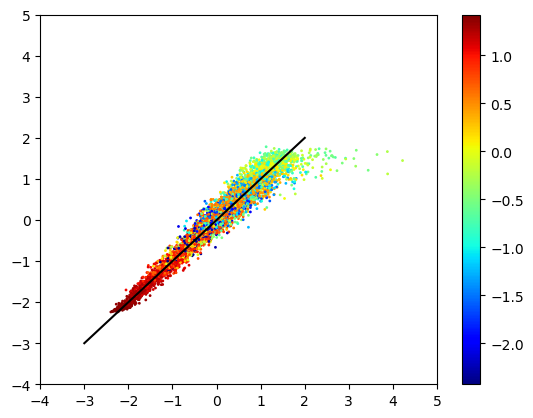

In [13]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=1.0,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
## 
from utils_training import GNN
val_batch = next(iter(val_loader))
y = model(val_batch)
from matplotlib import pyplot as plt
plt.scatter(val_batch.fip.detach().numpy(), y.detach().numpy(), s=1, c=val_batch.x[:,16], cmap='jet')
plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, val_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - val_batch.fip.detach().numpy()/val_batch.fip.detach().numpy())))
print(F.l1_loss(y, val_batch.fip))

tensor(0.0770, grad_fn=<MseLossBackward0>)
tensor(0.1906, grad_fn=<MeanBackward0>)


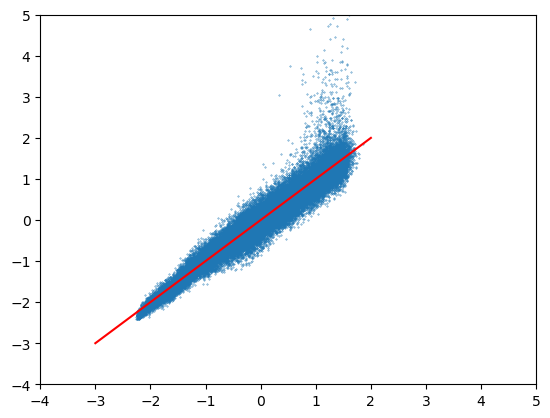

In [3]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=1.0,
                         )

# val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
#                        batch_fraction=1.0,
#                        )
## 
from utils_training import GNN
train_batch = next(iter(train_loader))
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(y.detach().numpy(), train_batch.fip.detach().numpy(), s=0.1)
plt.plot([-3,2],[-3,2],color='red')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - val_batch.fip.detach().numpy()/val_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))

In [3]:
from utils_training import train
from utils_training import GNN
from utils_training import getLoader

MAIN_DIR = "C:\\Users\\gyujang95\\Desktop\\Marat\\FIPGraph"

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=0.2,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
model = GNN()

train_params = {
    'opt_name': 'AdamW',
    'n_epoch': 1000,
    'lr': 1.e0,
    'weight_decay': 1.e-2,
    'loss_fname': 'mseLoss',
    'lr_decay_rate': 0.8
}

train(model=model,
      train_params=train_params,
      train_loader=train_loader,
      val_loader=val_loader,
      logfile_dir=f'{MAIN_DIR}\\log.csv',
      logfig_dir=f'{MAIN_DIR}\\fig_log.png',
      )

[Epoch 0]
[Loss : 1.4051986932754517]
[meanARE : 4.668535232543945]
[Learning rate : 0.01]
[Epoch 5]
[Loss : 0.9903702735900879]
[meanARE : 2.1952641010284424]
[Learning rate : 0.06]
[Epoch 10]
[Loss : 0.9534737467765808]
[meanARE : 1.9600677490234375]
[Learning rate : 0.11]
[Epoch 15]
[Loss : 0.9483665823936462]
[meanARE : 1.997124195098877]
[Learning rate : 0.16]
[Epoch 20]
[Loss : 0.9471211433410645]
[meanARE : 1.9116970300674438]
[Learning rate : 0.21]
[Epoch 25]
[Loss : 0.9465317130088806]
[meanARE : 1.8966530561447144]
[Learning rate : 0.26]
[Epoch 30]
[Loss : 0.9461435675621033]
[meanARE : 1.9052180051803589]
[Learning rate : 0.31]
[Epoch 35]
[Loss : 0.9467369914054871]
[meanARE : 1.848912000656128]
[Learning rate : 0.36]
[Epoch 40]
[Loss : 0.9464185237884521]
[meanARE : 1.9489134550094604]
[Learning rate : 0.41]
[Epoch 45]
[Loss : 0.9466841816902161]
[meanARE : 1.929526925086975]
[Learning rate : 0.46]
[Epoch 50]
[Loss : 0.9472784996032715]
[meanARE : 1.909806728363037]
[Learni

tensor(0.9540, grad_fn=<MseLossBackward0>)
tensor(0.7956, grad_fn=<MeanBackward0>)


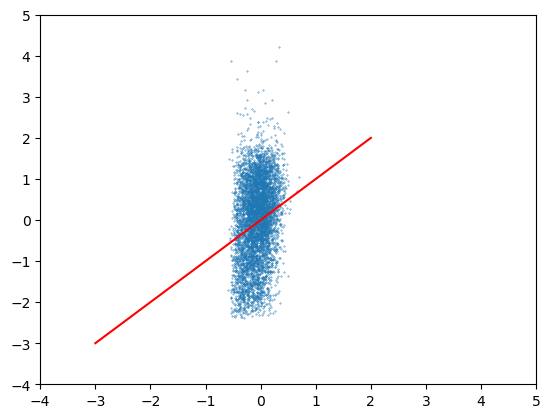

In [4]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=1.0,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
## 
from utils_training import GNN
val_batch = next(iter(val_loader))
y = model(val_batch)
from matplotlib import pyplot as plt
plt.scatter(y.detach().numpy(), val_batch.fip.detach().numpy(), s=0.1)
plt.plot([-3,2],[-3,2],color='red')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, val_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - val_batch.fip.detach().numpy()/val_batch.fip.detach().numpy())))
print(F.l1_loss(y, val_batch.fip))

In [1]:
MAIN_DIR = "C:\\Users\\gyujang95\\Desktop\\Marat\\FIPGraph"

C:\Users\gyujang95\AppData\Local\Temp\ipykernel_11416\1928215729.py:21: UserWarning: Using a target size (torch.Size([50010])) that is different to the input size (torch.Size([50010, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(F.mse_loss(y, train_batch.fip))


tensor(4.7419, grad_fn=<MseLossBackward0>)


C:\Users\gyujang95\AppData\Local\Temp\ipykernel_11416\1928215729.py:23: UserWarning: Using a target size (torch.Size([50010])) that is different to the input size (torch.Size([50010, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(F.l1_loss(y, train_batch.fip))


tensor(1.7382, grad_fn=<MeanBackward0>)


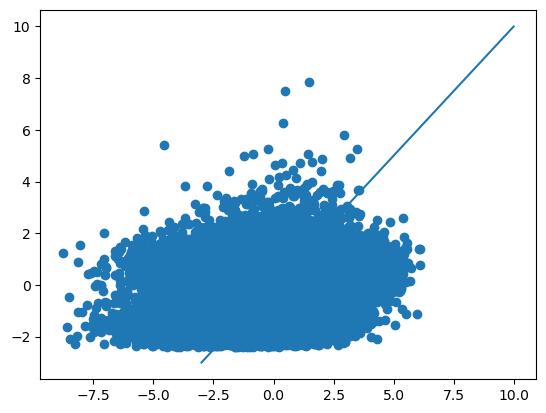

In [6]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=1.0,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
## 
from utils_training import GNN
model = GNN()
train_batch = next(iter(train_loader))
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(y.detach().numpy(), train_batch.fip.detach().numpy())
plt.plot([-3,10],[-3,10])
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))

C:\Users\gyujang95\AppData\Local\Temp\ipykernel_11416\3313138420.py:8: UserWarning: Using a target size (torch.Size([50010])) that is different to the input size (torch.Size([50010, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  F.mse_loss(y, train_batch.fip)


tensor(0.9993, grad_fn=<MseLossBackward0>)

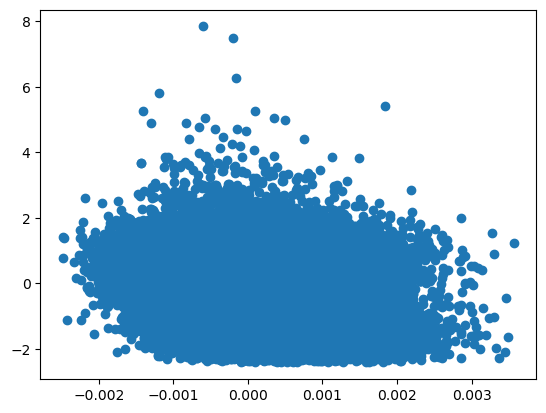

In [7]:
from utils_training import GNN
model = GNN()
train_batch = next(iter(train_loader))
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(y.detach().numpy(), train_batch.fip.detach().numpy())
import torch.nn.functional as F
F.mse_loss(y, train_batch.fip)

In [12]:

# plt.scatter(train_batch.x[:,None].detach().numpy(), train_batch.fip.detach().numpy())

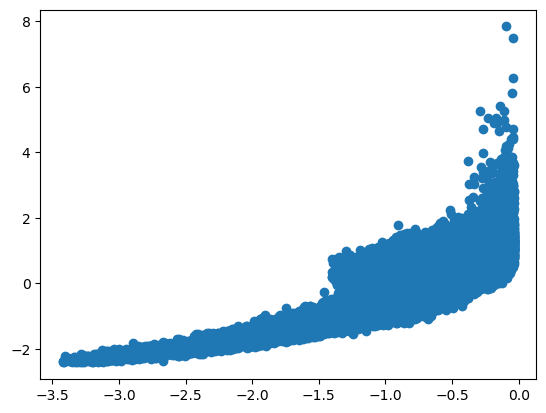

C:\Users\gyujang95\AppData\Local\Temp\ipykernel_11416\3143768461.py:6: UserWarning: Using a target size (torch.Size([50010])) that is different to the input size (torch.Size([50010, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  F.mse_loss(y, train_batch.fip)


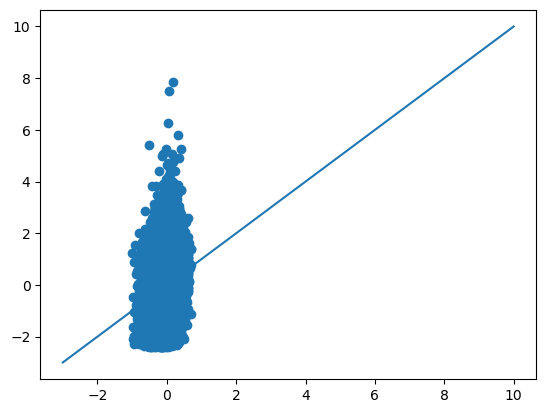

In [13]:
train_batch = next(iter(train_loader))
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(y.detach().numpy(), train_batch.fip.detach().numpy())
import torch.nn.functional as F
F.mse_loss(y, train_batch.fip)
plt.plot([-3,10],[-3,10])